In [230]:
# Import pandas untuk manipulasi data
import pandas as pd
# Import train_test_split dari sklearn.model_selection untuk membagi data menjadi data latih dan data uji
from sklearn.model_selection import train_test_split
# Import StandardScaler dan LabelEncoder dari sklearn.preprocessing untuk preprocessing data
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [231]:
# Membaca data dari file excel 'Data EES.xlsx' dan menyimpannya dalam variabel 'data'
data = pd.read_excel('Data EES.xlsx')

In [232]:
# Menampilkan 5 baris pertama dari data
print(data.head())

   No  Employee ID               Name  \
0   1    208061001  Yandri Firmansyah   
1   2    209011004     Kamal Sopianto   
2   3    209031007    Noviadi Widjaya   
3   4    209091010        Andryansyah   
4   5    209101013            Solihin   

                                  Job Grade Title  \
0                                    Section Head   
1                                           Staff   
2  Advisor / Principal Engineer / Department Head   
3                                    Section Head   
4                                           Staff   

                                           Job Title  \
0                          Station Duty Section Head   
1  Railway Electricity Technology Maintenance Reg...   
2                     Finance and Accounting Advisor   
3                          Station Duty Section Head   
4          Line Rolling Stock Maintenance Technician   

                                    Directorate  \
0         Operation and Maintenance Directorat

In [234]:
# Menampilkan nama-nama kolom dalam data
print(data.columns)

Index(['No', 'Employee ID', 'Name', 'Job Grade Title', 'Job Title',
       'Directorate', 'Division', 'Department', 'Location Type',
       'Work Schedule', 'Work Location', 'Date of Birth', 'Date of EOY',
       'Detailed Age', 'Age Group', 'Marital Status', 'Gender', 'Join Date',
       'Length of Employment', 'Length of Employment (2)', 'Employee \nStatus',
       'Latest Degree', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46',
       '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58',
       '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70',
       '71', '72', '73'],
      dtype='object')


In [235]:
# Mengubah kolom-kolom bertipe objek menjadi tipe string
for column in data.select_dtypes(include=['object']).columns:
    data[column] = data[column].astype(str)

In [236]:
# Inisialisasi dictionary 'label_encoders' untuk menyimpan objek LabelEncoder
label_encoders = {}
# Mengubah nilai-nilai pada kolom-kolom bertipe objek menjadi nilai numerik menggunakan LabelEncoder
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [237]:
# Menampilkan tipe data dari setiap kolom
print(data.dtypes)

No                 int64
Employee ID        int64
Name               int64
Job Grade Title    int64
Job Title          int64
                   ...  
69                 int64
70                 int64
71                 int64
72                 int64
73                 int64
Length: 95, dtype: object


# **KLASIFIKASI ~  Prediksi Status Karyawan**

In [238]:
from sklearn.ensemble import RandomForestClassifier # untuk klasifikasi menggunakan algoritma Random Forest
from sklearn.model_selection import train_test_split # untuk membagi data menjadi set data latih dan uji
from sklearn.preprocessing import StandardScaler # untuk standarisasi fitur numerik
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # untuk evaluasi model klasifikasi
import matplotlib.pyplot as plt # Impor matplotlib.pyplot sebagai plt untuk plotting
import seaborn as sns # Impor seaborn sebagai sns untuk visualisasi

In [239]:
X_class = data[['Age Group', 'Gender', 'Length of Employment (2)', 'Work Location', 'Latest Degree']] # Pilih fitur untuk klasifikasi
y_class = data['Employee \nStatus'] # Pilih variabel target untuk klasifikasi

In [240]:
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.3, random_state=42) # Bagi data menjadi set data latih dan uji (70% latih, 30% uji)

In [241]:
scaler_class = StandardScaler() # Inisialisasi StandardScaler untuk standarisasi fitur numerik
# Standarisasi fitur numerik dalam set data latih dan uji
X_train_class = scaler_class.fit_transform(X_train_class)
X_test_class = scaler_class.transform(X_test_class)

In [242]:
# Inisialisasi RandomForestClassifier dengan suatu nilai state acak untuk reproduktibilitas
model_class = RandomForestClassifier(random_state=42)
model_class.fit(X_train_class, y_train_class) # Latih model RandomForestClassifier

RandomForestClassifier(random_state=42)

In [243]:
# Lakukan prediksi pada set data uji
y_pred_class = model_class.predict(X_test_class)

In [244]:
print("Confusion Matrix:")
print(confusion_matrix(y_test_class, y_pred_class))
print("\nClassification Report:")
print(classification_report(y_test_class, y_pred_class))
print("\nAccuracy Score:", accuracy_score(y_test_class, y_pred_class))

Confusion Matrix:
[[  1   0]
 [  0 212]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00       212

    accuracy                           1.00       213
   macro avg       1.00      1.00      1.00       213
weighted avg       1.00      1.00      1.00       213


Accuracy Score: 1.0


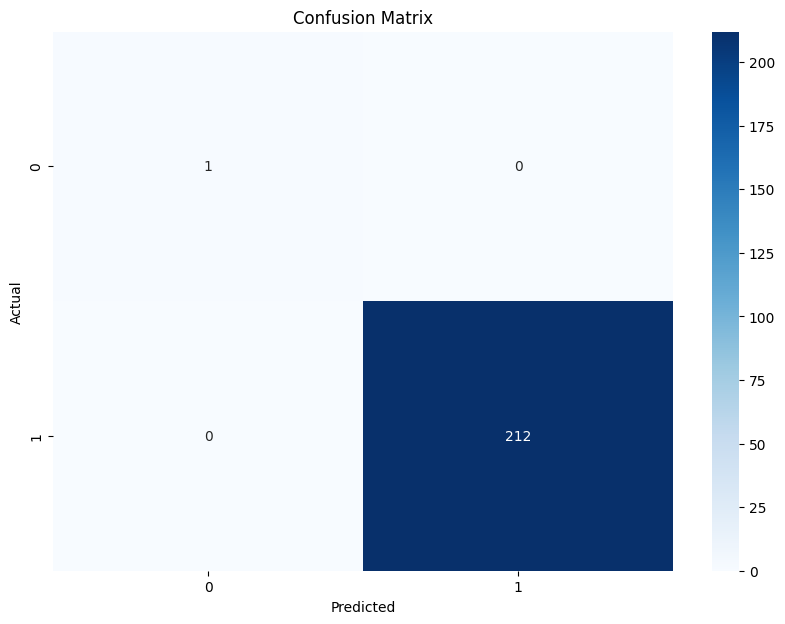

In [245]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test_class, y_pred_class), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **REGRESI**

In [246]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [247]:
X_reg = data[['Age Group', 'Gender', 'Marital Status', 'Latest Degree', 'Job Grade Title']]
y_reg = data['Length of Employment (2)']

In [248]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

In [249]:
print(data.describe())

               No   Employee ID        Name  Job Grade Title   Job Title  \
count  708.000000  7.080000e+02  708.000000       708.000000  708.000000   
mean   354.500000  1.249905e+08  352.725989         3.861582  186.988701   
min      1.000000  1.000100e+04    0.000000         0.000000    0.000000   
25%    177.750000  1.022175e+04  175.750000         3.000000  126.000000   
50%    354.500000  2.150261e+08  352.500000         3.000000  207.000000   
75%    531.250000  2.180314e+08  529.250000         6.000000  261.250000   
max    708.000000  2.181126e+08  706.000000         7.000000  298.000000   
std    204.526282  1.072549e+08  204.223305         1.736714   84.940531   

       Directorate    Division  Department  Location Type  Work Schedule  ...  \
count   708.000000  708.000000  708.000000     708.000000     708.000000  ...   
mean      3.166667   13.329096   45.218927       0.594633       0.456215  ...   
min       0.000000    0.000000    0.000000       0.000000       0.000000

In [250]:
scaler_reg = StandardScaler()
X_train_reg = scaler_reg.fit_transform(X_train_reg)
X_test_reg = scaler_reg.transform(X_test_reg)

In [251]:
model_reg = LinearRegression()
model_reg.fit(X_train_reg, y_train_reg)

LinearRegression()

In [252]:
y_pred_reg = model_reg.predict(X_test_reg)

In [253]:
print("\nMean Squared Error:", mean_squared_error(y_test_reg, y_pred_reg))
print("R^2 Score:", r2_score(y_test_reg, y_pred_reg))


Mean Squared Error: 4.138193382745205
R^2 Score: 0.18080801634596133


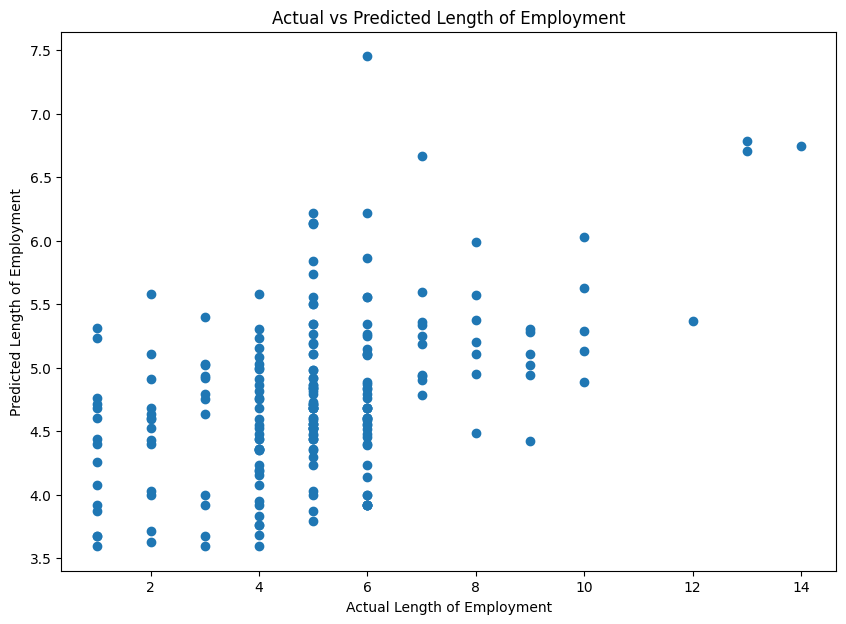

In [254]:
plt.figure(figsize=(10,7))
plt.scatter(y_test_reg, y_pred_reg)
plt.xlabel('Actual Length of Employment')
plt.ylabel('Predicted Length of Employment')
plt.title('Actual vs Predicted Length of Employment')
plt.show()

CLUSTERING

In [255]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [256]:
X_clust = data[['Age Group', 'Length of Employment (2)']]

In [257]:
X_clust = StandardScaler().fit_transform(X_clust)

In [258]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_clust)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [259]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_clust)

In [260]:
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

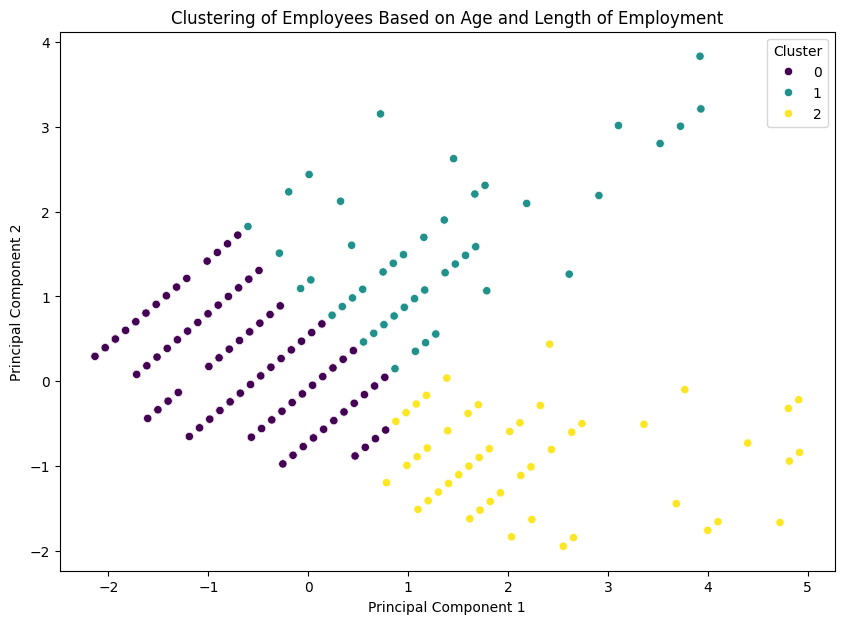

In [261]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('Clustering of Employees Based on Age and Length of Employment')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Analisis

In [268]:
import pandas as pd
EES = pd.read_excel('Data EES.xlsx')

In [273]:
pd.set_option('display.max_columns', None)
print(EES)

      No  Employee ID                  Name  \
0      1    208061001     Yandri Firmansyah   
1      2    209011004        Kamal Sopianto   
2      3    209031007       Noviadi Widjaya   
3      4    209091010           Andryansyah   
4      5    209101013               Solihin   
..   ...          ...                   ...   
703  704        10366           Ade Arianti   
704  705        10367      Ayu Mutiara Sari   
705  706        10368  Siti Janatun A'ni'ah   
706  707        10103          Rubby Riesta   
707  708        10261   Ruby Ayu Megadewani   

                                    Job Grade Title  \
0                                      Section Head   
1                                             Staff   
2    Advisor / Principal Engineer / Department Head   
3                                      Section Head   
4                                             Staff   
..                                              ...   
703                           Engineer / Specialis

In [284]:
# Fungsi untuk menghitung rata-rata untuk setiap kategori
def calculate_average(data, start_col, end_col):
    category_data = data.iloc[:, start_col-1:end_col]  # -1 karena indeks kolom pandas dimulai dari 0
    category_mean_per_question = category_data.mean(axis=0, skipna=True)  # Rata-rata per kolom
    overall_mean = category_mean_per_question.mean(skipna=True)  # Rata-rata keseluruhan dari semua pertanyaan
    return overall_mean

In [285]:
# Menghitung rata-rata untuk setiap kategori
overall_leadership = calculate_average(EES, 23, 38)
overall_day_to_day = calculate_average(EES, 39, 53)
overall_teamwork = calculate_average(EES, 54, 68)
overall_organization = calculate_average(EES, 69, 83)
overall_performance = calculate_average(EES, 84, 89)
overall_retention = calculate_average(EES, 90, 95)

In [286]:
# Menampilkan hasil rata-rata
print("Overall Leadership:", overall_leadership)
print("Overall Day to Day:", overall_day_to_day)
print("Overall TeamWork:", overall_teamwork)
print("Overall Organization:", overall_organization)
print("Overall Performance:", overall_performance)
print("Overall Retention:", overall_retention)

Overall Leadership: 4.0905720338983045
Overall Day to Day: 4.225235404896422
Overall TeamWork: 4.253389830508476
Overall Organization: 4.026271186440678
Overall Performance: 4.036016949152542
Overall Retention: 4.036016949152542


In [287]:
# Gender
gender_counts = EES['Gender'].value_counts()
gender_percentages = EES['Gender'].value_counts(normalize=True) * 100
print("Gender Percentages:\n", gender_percentages)

Gender Percentages:
 Gender
Male      71.327684
Female    28.672316
Name: proportion, dtype: float64


In [289]:
# Marital Status
marital_counts = EES['Marital Status'].value_counts()
marital_percentages = EES['Marital Status'].value_counts(normalize=True) * 100
print("Marital Status Percentages:\n", marital_percentages)

Marital Status Percentages:
 Marital Status
Married    71.045198
Single     28.954802
Name: proportion, dtype: float64


In [290]:
# Location Type
location_counts = EES['Location Type'].value_counts()
location_percentages = EES['Location Type'].value_counts(normalize=True) * 100
print("Location Type Percentages:\n", location_percentages)

Location Type Percentages:
 Location Type
WS    59.463277
HO    40.536723
Name: proportion, dtype: float64


In [291]:
# Work Schedule
work_schedule_counts = EES['Work Schedule'].value_counts()
work_schedule_percentages = EES['Work Schedule'].value_counts(normalize=True) * 100
print("Work Schedule Percentages:\n", work_schedule_percentages)

Work Schedule Percentages:
 Work Schedule
Office Hour    54.378531
Shift          45.621469
Name: proportion, dtype: float64


In [293]:
# Employee Status
employee_status_counts = EES['Employee \nStatus'].value_counts()
employee_status_percentages = EES['Employee \nStatus'].value_counts(normalize=True) * 100
print("Employee Status Percentages:\n", employee_status_percentages)

Employee Status Percentages:
 Employee \nStatus
Permanent    98.587571
Contract      1.412429
Name: proportion, dtype: float64


In [294]:
# Latest Degree
degree_counts = EES['Latest Degree'].value_counts()
degree_percentages = EES['Latest Degree'].value_counts(normalize=True) * 100
print("Latest Degree Percentages:\n", degree_percentages)

Latest Degree Percentages:
 Latest Degree
Bachelor       67.090395
Master         15.112994
Diploma        11.440678
High School     6.355932
Name: proportion, dtype: float64


In [295]:
# Directorate
directorate_counts = EES['Directorate'].value_counts()
directorate_percentages = EES['Directorate'].value_counts(normalize=True) * 100
print("Directorate Percentages:\n", directorate_percentages)

Directorate Percentages:
 Directorate
Operation and Maintenance Directorate           65.395480
Finance and Corporate Management Directorate    10.875706
Construction Directorate                        10.875706
Main Directorate                                 7.485876
Business Development Directorate                 5.367232
Name: proportion, dtype: float64


In [297]:
# Mengganti nilai "engineer / Specialist" menjadi "Engineer / Specialist"
EES['Job Grade Title'] = EES['Job Grade Title'].replace("engineer / Specialist", "Engineer / Specialist")


In [298]:
# Job Grade Title
job_grade_counts = EES['Job Grade Title'].value_counts()
job_grade_percentages = EES['Job Grade Title'].value_counts(normalize=True) * 100
print("Job Grade Title Percentages:\n", job_grade_percentages)

Job Grade Title Percentages:
 Job Grade Title
Engineer / Specialist                             36.864407
Staff                                             32.627119
Section Head                                      14.830508
Department Head                                    9.463277
Division Head                                      3.107345
Advisor / Principal Engineer / Department Head     2.259887
Senior Advisor / Division Head                     0.847458
Name: proportion, dtype: float64


In [304]:
import pandas as pd

In [305]:
# Memisahkan data berdasarkan gender
female_data = EES[EES['Gender'] == "Female"]
male_data = EES[EES['Gender'] == "Male"]

In [306]:
# Fungsi untuk menghitung rata-rata untuk setiap kategori
def calculate_avg(data, columns):
    return data[columns].mean(axis=1, skipna=True)

In [308]:
# Menghitung rata-rata untuk tiap kategori untuk gender Female
female_data.loc[:, 'leadership_avg'] = calculate_avg(female_data, EES.columns[23:38])
female_data.loc[:, 'daytoday_avg'] = calculate_avg(female_data, EES.columns[39:53])
female_data.loc[:, 'teamwork_avg'] = calculate_avg(female_data, EES.columns[54:68])
female_data.loc[:, 'organization_avg'] = calculate_avg(female_data, EES.columns[69:83])
female_data.loc[:, 'performance_avg'] = calculate_avg(female_data, EES.columns[84:89])
female_data.loc[:, 'retention_avg'] = calculate_avg(female_data, EES.columns[90:95])

In [309]:
avg_leadership_female = female_data['leadership_avg'].mean()
avg_daytoday_female = female_data['daytoday_avg'].mean()
avg_teamwork_female = female_data['teamwork_avg'].mean()
avg_organization_female = female_data['organization_avg'].mean()
avg_performance_female = female_data['performance_avg'].mean()
avg_retention_female = female_data['retention_avg'].mean()

In [310]:
print("Average Leadership for Female:", avg_leadership_female)
print("Average Day-to-Day for Female:", avg_daytoday_female)
print("Average Teamwork for Female:", avg_teamwork_female)
print("Average Organization for Female:", avg_organization_female)
print("Average Performance for Female:", avg_performance_female)
print("Average Retention for Female:", avg_retention_female)

Average Leadership for Female: 4.039737274220032
Average Day-to-Day for Female: 4.136875439831105
Average Teamwork for Female: 4.196692470091485
Average Organization for Female: 3.95707248416608
Average Performance for Female: 3.9862068965517246
Average Retention for Female: 3.935960591133005


In [312]:
import pandas as pd

In [313]:
# Menghitung rata-rata skor untuk setiap item survei
rata_rata_item_survei = EES.iloc[:, 23:95].mean(axis=0, skipna=True)

In [314]:
# Mengurutkan rata-rata skor dari tertinggi ke terendah
urutan_tertinggi = rata_rata_item_survei.sort_values(ascending=False)

In [315]:
# Mengambil 10 item survei pertama dengan rata-rata skor tertinggi
top_10_survei = urutan_tertinggi.head(10)

In [316]:
# Menampilkan 10 item survei dengan rata-rata skor tertinggi
top_10_survei_dan_skor = pd.DataFrame({
    'Item_Survei': top_10_survei.index,
    'Rata_Rata_Skor': top_10_survei.values
})

In [317]:
# Menambahkan Focal Point berdasarkan item survei
focal_points_top = ['Day to Day', 'Day to Day', 'Teamwork', 'Day to Day', 'Organization',
                    'Organization', 'Teamwork', 'Organization', 'Teamwork', 'Teamwork']
top_10_survei_dan_skor['Focal_Point'] = focal_points_top

In [318]:
print("Top 10 Survey Items with Highest Average Scores:")
print(top_10_survei_dan_skor)

Top 10 Survey Items with Highest Average Scores:
  Item_Survei  Rata_Rata_Skor   Focal_Point
0          27        4.440678    Day to Day
1          17        4.387006    Day to Day
2          37        4.372881      Teamwork
3          18        4.354520    Day to Day
4          58        4.330508  Organization
5          53        4.305085  Organization
6          34        4.293785      Teamwork
7          57        4.275424  Organization
8          45        4.271186      Teamwork
9          35        4.269774      Teamwork


In [319]:
# Mengurutkan rata-rata skor dari terendah ke tertinggi
urutan_terendah = rata_rata_item_survei.sort_values(ascending=True)

In [320]:
# Mengambil 10 item survei pertama dengan rata-rata skor terendah
bottom_10_survei = urutan_terendah.head(10)

In [321]:
# Menampilkan 10 item survei dengan rata-rata skor terendah
bottom_10_survei_dan_skor = pd.DataFrame({
    'Item_Survei': bottom_10_survei.index,
    'Rata_Rata_Skor': bottom_10_survei.values
})

In [322]:
# Menambahkan Focal Point berdasarkan item survei
focal_points_bottom = ['Organization', 'Organization', 'Organization', 'Performance', 'Organization',
                       'Organization', 'Leadership', 'Organization', 'Day to Day', 'Performance']
bottom_10_survei_dan_skor['Focal_Point'] = focal_points_bottom

In [323]:
print("Top 10 Survey Items with Lowest Average Scores:")
print(bottom_10_survei_dan_skor)

Top 10 Survey Items with Lowest Average Scores:
  Item_Survei  Rata_Rata_Skor   Focal_Point
0          48        3.552260  Organization
1          50        3.707627  Organization
2          47        3.716102  Organization
3          62        3.768362   Performance
4          52        3.783898  Organization
5          49        3.877119  Organization
6           7        3.902542    Leadership
7          51        3.947740  Organization
8          26        3.951977    Day to Day
9          63        3.953390   Performance


In [324]:
import pandas as pd

# Filter data untuk Construction Directorate
construction_directorate = EES[EES['Directorate'] == "Construction Directorate"]

# Menghitung rata-rata indeks leadership per karyawan
construction_directorate['Average_Leadership'] = construction_directorate.iloc[:, 22:38].mean(axis=1, skipna=True)

# Mengurutkan data berdasarkan rata-rata indeks leadership
sorted_construction_directorate = construction_directorate.sort_values(by='Average_Leadership')

# Menampilkan hasil
result_cd = sorted_construction_directorate[['Name', 'Division', 'Average_Leadership']]
print("Construction Directorate:")
print(result_cd)

Construction Directorate:
                            Name  \
534        Adeline Emurini Zebua   
650  Dearesti Ozadita Prabandani   
52                 Helmi Fathoni   
317       Anggoro Nosa Andriansa   
662          Wijayanto Adi Surya   
..                           ...   
565         Lukluk Zuraida Jamal   
70     Abdurrahim Majid El Yumin   
43     Muhammad Ishaq Arya Suluh   
112         Dimas Setiyo Nugroho   
681         Alwan Rizaldi Faizal   

                                           Division  Average_Leadership  
534              Program Management Office Division              3.2500  
650                                               0              3.3750  
52   Project Management for Construction 2 Division              3.4375  
317                            Engineering Division              3.5000  
662                                               0              3.5000  
..                                              ...                 ...  
565  Project Management

<ipython-input-324-021d96ddf164>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  construction_directorate['Average_Leadership'] = construction_directorate.iloc[:, 22:38].mean(axis=1, skipna=True)
